# Notes<br><small>November 30, 2016</small>

## Quiz Review

### Problem 1

In [1]:
dice=rand(1:6,10^6,4)

1000000×4 Array{Int64,2}:
 3  1  4  5
 3  6  5  3
 5  3  5  5
 4  2  6  6
 5  2  6  4
 4  5  3  5
 1  2  1  3
 1  2  5  3
 4  4  1  2
 4  4  4  3
 2  4  1  2
 2  3  6  1
 5  2  5  2
 ⋮         
 6  5  5  5
 5  6  6  4
 4  4  6  4
 2  4  5  6
 5  4  2  2
 3  4  5  1
 3  5  1  5
 2  6  5  4
 4  1  1  5
 2  5  3  6
 5  1  3  1
 5  3  6  3

In [2]:
odds=mapslices(a->mapreduce(isodd,(x,y)->x&&y,a),dice,[2])

1000000×1 Array{Bool,2}:
 false
 false
  true
 false
 false
 false
 false
 false
 false
 false
 false
 false
 false
     ⋮
 false
 false
 false
 false
 false
 false
  true
 false
 false
 false
  true
 false

In [3]:
count(a->a,odds)/10^6

0.06207

### Problem 3

In [4]:
using JSON
f=open("../quizzes/quiz03/bigmenu.json","r")
menu = JSON.parse(f)
close(f)

In [5]:
meal = Dict("hamburger"=>2, "caesar salad"=>1, "soda"=>1, "orange juice"=>1, "pumpkin pie"=>1, "chocolate cake"=>1)

Dict{String,Int64} with 6 entries:
  "hamburger"      => 2
  "orange juice"   => 1
  "soda"           => 1
  "pumpkin pie"    => 1
  "caesar salad"   => 1
  "chocolate cake" => 1

In [6]:
map(a->menu[a]["cost"],keys(meal))

6-element Array{Float64,1}:
  9.0
  2.0
  2.0
  5.0
 11.0
  4.5

In [7]:
values(meal)

Base.ValueIterator for a Dict{String,Int64} with 6 entries. Values:
  2
  1
  1
  1
  1
  1

In [8]:
function total_cost(items::Dict{String,Int})
    sum(map(a->menu[a]["cost"],keys(items)).*collect(values(items)))
end

total_cost (generic function with 1 method)

In [9]:
total_cost(meal)

42.5

## Chapter 17: Complex Numbers

In [10]:
i = sqrt(complex(-1))

0.0 + 1.0im

In [11]:
z1 = 2+im

2 + 1im

In [12]:
typeof(z1)

Complex{Int64}

In [13]:
z2 = 3+4.0im

3.0 + 4.0im

In [14]:
typeof(z2)

Complex{Float64}

In [15]:
z1+z2

5.0 + 5.0im

In [16]:
z1-z2

-1.0 - 3.0im

In [17]:
z1*z2

2.0 + 11.0im

In [18]:
z1/z2

0.4 - 0.2im

In [19]:
abs(z1)

2.23606797749979

In [20]:
sqrt(5)

2.23606797749979

In [21]:
abs(z2)

5.0

In [22]:
angle(z1)

0.4636476090008061

The angle in degrees is

In [23]:
angle(z1)*180/pi

26.56505117707799

### Complex Solution the Quadratic Equation

In [24]:
function qSol(a::Number, b::Number, c::Number)
    d=sqrt(b^2-4*a*c)
    (-b+d)/(2a),(-b-d)/(2a)
end

qSol (generic function with 1 method)

In [25]:
qSol(1,-4,3)

(3.0,1.0)

In [26]:
qSol(complex(1),complex(0),complex(4))

(0.0 + 2.0im,0.0 - 2.0im)

In [27]:
qSol(1,0+0im,4)

(0.0 + 2.0im,0.0 - 2.0im)

## Chapter 18: Images

In [28]:
# You may need install these packages as well as ImageMagick and QuartzImageIO
using Images, Colors, ImageView, TestImages

INFO: Recompiling stale cache file /Users/joshuanasiatka/.julia/lib/v0.5/Images.ji for module Images.
INFO: Recompiling stale cache file /Users/joshuanasiatka/.julia/lib/v0.5/Cairo.ji for module Cairo.


INFO: Precompiling module QuartzImageIO.


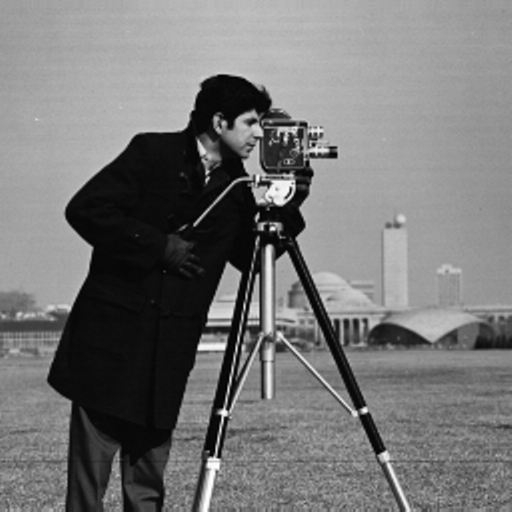

In [29]:
man = testimage("cameraman")

In [30]:
info(man)

INFO: Gray Images.Image with:
  data: 512×512 Array{ColorTypes.Gray{FixedPointNumbers.UFixed{UInt8,8}},2}
  properties:
    colorspace: Gray
    imagedescription: <suppressed>
    spatialorder:  x y
    pixelspacing:  1 1


In [31]:
raw(man)

512×512 Array{UInt8,2}:
 0x9c  0x9c  0x9e  0xa0  0x9e  0x9c  …  0x79  0x72  0x74  0x79  0x79  0x79
 0x9d  0x9d  0x9d  0x9d  0x9d  0x9d     0x7b  0x7c  0x7b  0x7b  0x7b  0x7b
 0xa0  0x9f  0x9c  0x9a  0x9c  0x9f     0x7d  0x85  0x82  0x7e  0x7e  0x7e
 0x9f  0x9e  0x9c  0x9a  0x9c  0x9f     0x7d  0x82  0x80  0x7e  0x7e  0x7e
 0x9e  0x9e  0x9d  0x9c  0x9d  0x9f     0x7b  0x7a  0x7e  0x83  0x83  0x82
 0x9c  0x9c  0x9d  0x9d  0x9c  0x9c  …  0x73  0x6e  0x81  0x96  0x98  0x96
 0x9b  0x9b  0x9d  0x9e  0x9b  0x9a     0x6a  0x63  0x81  0xa2  0xa6  0xa2
 0x9c  0x9c  0x9d  0x9d  0x9b  0x9b     0x5a  0x58  0x6c  0x82  0x84  0x81
 0x9e  0x9e  0x9d  0x9d  0x9d  0x9e     0x55  0x5a  0x60  0x66  0x66  0x65
 0x9d  0x9d  0x9e  0x9e  0x9d  0x9d     0x71  0x7c  0x7e  0x7e  0x7e  0x7d
 0x9c  0x9c  0x9e  0xa0  0x9e  0x9c  …  0x8f  0x9c  0x9f  0xa0  0xa0  0xa0
 0x9d  0x9d  0x9e  0x9f  0x9e  0x9d     0x8d  0x93  0xa0  0xac  0xad  0xac
 0x9f  0x9f  0x9e  0x9e  0x9e  0x9f     0x82  0x80  0x95  0xac  0xaf  0xac
 

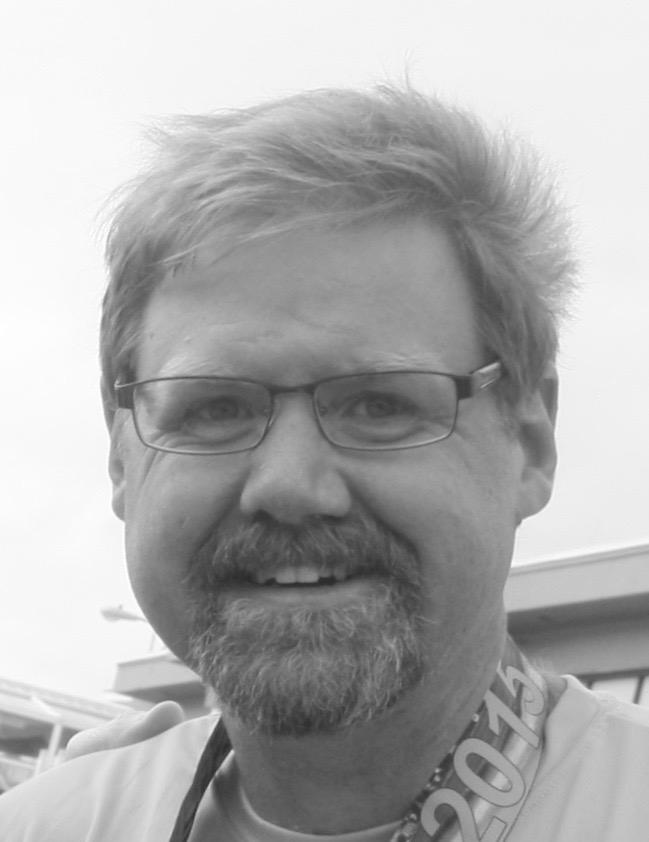

In [32]:
load("staab-bw.jpg")

### Creating a Gray Scale image

In [33]:
data=rand(UInt8,200,200)

200×200 Array{UInt8,2}:
 0xfa  0x0d  0xa9  0xfd  0xb6  0x59  …  0x4a  0x63  0xb2  0xd8  0x68  0x5f
 0xcb  0x63  0xb5  0x74  0xe6  0x3a     0x22  0xbe  0xfd  0xa3  0x43  0x61
 0x08  0x64  0x7b  0x03  0x18  0x08     0x9f  0x68  0x47  0x99  0x55  0xdd
 0xb3  0x03  0x77  0x73  0xfe  0x37     0x0c  0x22  0x4c  0x02  0x1d  0x4b
 0xc9  0x37  0x72  0x48  0x21  0xfe     0xa2  0x97  0xce  0x37  0x4e  0xf3
 0xb0  0x17  0x25  0x88  0xa7  0xf3  …  0x96  0x7a  0xde  0x33  0xd5  0x4e
 0xb0  0xe3  0x62  0xe9  0x48  0x73     0x47  0x2f  0x3b  0xf6  0x15  0x61
 0xec  0x05  0x0b  0x55  0x95  0xe2     0x85  0xf5  0x1f  0x91  0x2a  0x31
 0x9b  0xfd  0x6b  0x34  0x1b  0xe2     0x71  0x3b  0x05  0x72  0x38  0xe6
 0x06  0x0f  0x27  0xab  0xd4  0xc3     0x96  0xa0  0x6b  0x5e  0x01  0x2a
 0xf8  0x1a  0xdd  0x55  0x2d  0xc3  …  0xc3  0x6a  0xd2  0xfb  0x97  0x72
 0x8f  0xb4  0xe5  0xe6  0xf6  0xe6     0xe6  0x3c  0xc1  0x6a  0xc1  0x22
 0x5f  0xe4  0x85  0x38  0xe5  0x84     0xb7  0xff  0xb3  0x68  0x00  0xf6
 

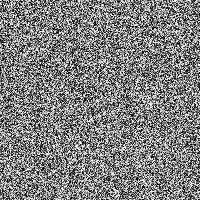

In [34]:
grayim(data)

In [35]:
data2=[(i-100)^2+(j-100)^2<50^2?UInt8(i+j-100):UInt8(125) for i=1:200, j=1:200]

200×200 Array{UInt8,2}:
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d  …  0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d     0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d     0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d     0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d     0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d  …  0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d     0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d     0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d     0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d     0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d  …  0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d     0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 0x7d  0x7d  0x7d  0x7d  0x7d  0x7d     0x7d  0x7d  0x7d  0x7d  0x7d  0x7d
 

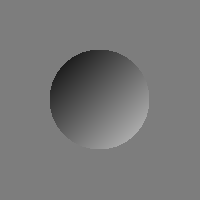

In [36]:
grayim(data2)

### Color Images

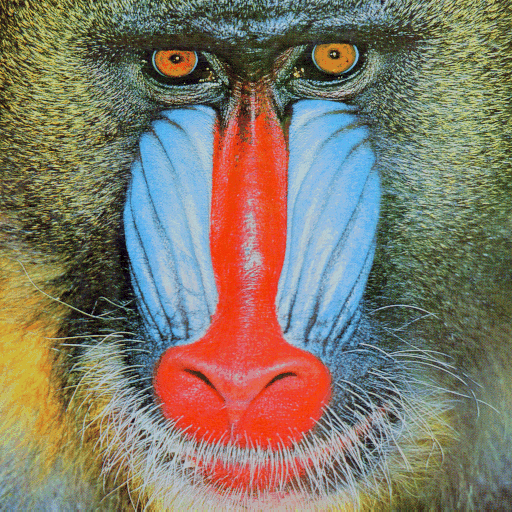

In [37]:
# Some Lion King
mandrill = testimage("mandril_color")

In [38]:
info(mandrill)

INFO: RGB Images.Image with:
  data: 512×512 Array{ColorTypes.RGB{FixedPointNumbers.UFixed{UInt8,8}},2}
  properties:
    colorspace: RGB
    imagedescription: <suppressed>
    spatialorder:  x y
    pixelspacing:  1 1


In [39]:
raw(mandrill)

3×512×512 Array{UInt8,3}:
[:, :, 1] =
 0xa6  0x38  0x41  0x62  0x89  0x62  …  0x4d  0x30  0x8b  0x6a  0x8d  0xab
 0x8b  0x30  0x2a  0x4a  0x83  0x5b     0x3f  0x39  0x84  0x73  0x9c  0xbd
 0x3e  0x23  0x1a  0x26  0x39  0x27     0x22  0x34  0x36  0x32  0x63  0x71

[:, :, 2] =
 0x6a  0x8b  0x26  0x3b  0x61  0x32  …  0x41  0x79  0x74  0x72  0x82  0x75
 0x73  0x64  0x18  0x40  0x4a  0x26     0x31  0x74  0x7d  0x84  0x9b  0x7c
 0x32  0x2b  0x18  0x22  0x28  0x18     0x31  0x57  0x52  0x52  0x7b  0x39

[:, :, 3] =
 0x4b  0x7b  0x32  0x2a  0x5a  0x40  …  0x73  0x73  0x62  0x62  0x52  0x61
 0x40  0x6b  0x2a  0x28  0x62  0x29     0x84  0x7b  0x59  0x52  0x53  0x4a
 0x20  0x30  0x17  0x19  0x2f  0x19     0x50  0x63  0x30  0x5c  0x41  0x28

...

[:, :, 510] =
 0x74  0x73  0x75  0x74  0x60  0x63  …  0x59  0x4a  0x49  0x57  0x5c  0x4a
 0x8a  0x94  0x8c  0x8b  0x83  0x7b     0x52  0x4a  0x64  0x42  0x52  0x4b
 0xa1  0x81  0x84  0x9b  0x89  0x6b     0x38  0x42  0x43  0x31  0x39  0x39

[:, :, 511] =
 

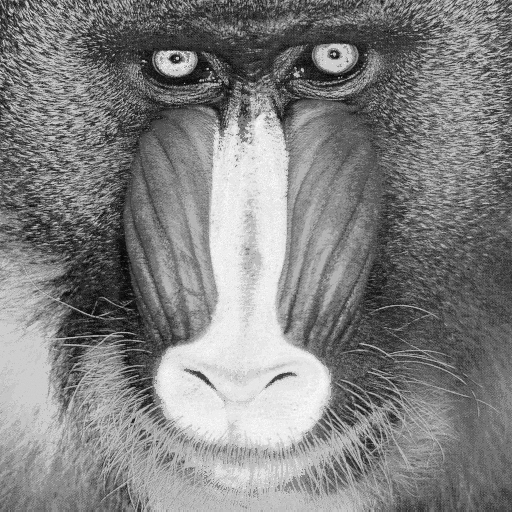

In [45]:
grayim(raw(mandrill)[1,:,:])

In [48]:
colormap("blues",15)

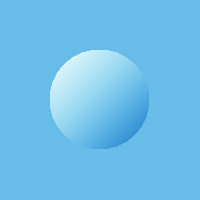

In [49]:
ImageCmap(data2,colormap("blues",255))

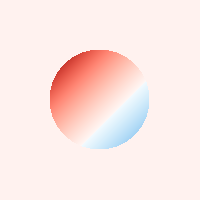

In [52]:
ImageCmap(data2,colormap("RdBu",255))

## Chapter 19: Newton’s Method in the Complex Plane

In [3]:
function newton(f::Function, df::Function, x0::Number, maxsteps::Number=100, stopping::Number=1e-6)
    maxsteps > 0 || throw(ArgumentError("GAH! MaxSteps cannot be <= 0. Must be 1 or greater."))
    1 > stopping > 0 || throw(ArgumentError("ERR: Stop must be between 0 and 1"))
    x1 = x0
    x2 = x0+1
    steps = 0
    while(abs(x2-x1) > stopping && steps < maxsteps)
        x1 = x2
        x2 = x1 - f(x1)/df(x1)
        steps += 1
    end
    x2
end

newton (generic function with 3 methods)

In [4]:
newton(x->x^2+4,x->2x,3)

3.787671989721673

In [5]:
newton(x->x^2+4,x->2x,3+1im)

1.3846421842769482e-21 + 2.0im

In [6]:
newton(x->x^2+4,x->2x,-3-1im)

2.0918299248552159e-13 - 1.999999999999978im

In [7]:
Z=[x+im*y for y=1:-0.1:-1, x=-1:0.1:1]

21×21 Array{Complex{Float64},2}:
 -1.0+1.0im  -0.9+1.0im  -0.8+1.0im  …  0.8+1.0im  0.9+1.0im  1.0+1.0im
 -1.0+0.9im  -0.9+0.9im  -0.8+0.9im     0.8+0.9im  0.9+0.9im  1.0+0.9im
 -1.0+0.8im  -0.9+0.8im  -0.8+0.8im     0.8+0.8im  0.9+0.8im  1.0+0.8im
 -1.0+0.7im  -0.9+0.7im  -0.8+0.7im     0.8+0.7im  0.9+0.7im  1.0+0.7im
 -1.0+0.6im  -0.9+0.6im  -0.8+0.6im     0.8+0.6im  0.9+0.6im  1.0+0.6im
 -1.0+0.5im  -0.9+0.5im  -0.8+0.5im  …  0.8+0.5im  0.9+0.5im  1.0+0.5im
 -1.0+0.4im  -0.9+0.4im  -0.8+0.4im     0.8+0.4im  0.9+0.4im  1.0+0.4im
 -1.0+0.3im  -0.9+0.3im  -0.8+0.3im     0.8+0.3im  0.9+0.3im  1.0+0.3im
 -1.0+0.2im  -0.9+0.2im  -0.8+0.2im     0.8+0.2im  0.9+0.2im  1.0+0.2im
 -1.0+0.1im  -0.9+0.1im  -0.8+0.1im     0.8+0.1im  0.9+0.1im  1.0+0.1im
 -1.0+0.0im  -0.9+0.0im  -0.8+0.0im  …  0.8+0.0im  0.9+0.0im  1.0+0.0im
 -1.0-0.1im  -0.9-0.1im  -0.8-0.1im     0.8-0.1im  0.9-0.1im  1.0-0.1im
 -1.0-0.2im  -0.9-0.2im  -0.8-0.2im     0.8-0.2im  0.9-0.2im  1.0-0.2im
 -1.0-0.3im  -0.9-0.3im  -0.8-0

In [8]:
roots=map(a->newton(x->x^(3-1),x->(3x)*2,a),Z)

21×21 Array{Complex{Float64},2}:
 0.0+4.95287e-6im     4.95287e-7+4.95287e-6im    …  3.98089e-6+1.99045e-6im  
 0.0+4.45758e-6im     4.95287e-7+4.45758e-6im        3.98089e-6+1.7914e-6im  
 0.0+4.75475e-6im     5.94344e-7+4.75475e-6im       3.98089e-6+1.59236e-6im  
 0.0+4.99249e-6im     5.94344e-7+4.16041e-6im       3.98089e-6+1.39331e-6im  
 0.0+4.27928e-6im     7.13213e-7+4.27928e-6im       4.77707e-6+1.43312e-6im  
 0.0+4.27928e-6im     8.55855e-7+4.27928e-6im    …  4.77707e-6+1.19427e-6im  
 0.0+4.92973e-6im      1.02703e-6+4.1081e-6im       4.77707e-6+9.55414e-7im  
 0.0+4.43675e-6im     1.47892e-6+4.43675e-6im        4.77707e-6+7.1656e-7im  
 0.0+4.25928e-6im     2.12964e-6+4.25928e-6im       4.77707e-6+4.77707e-7im  
 0.0+4.41602e-6im     3.06668e-6+3.06668e-6im       4.77707e-6+2.38853e-7im  
          NaN+NaN*im           4.41602e-6+0.0im  …           4.77707e-6+0.0im
 0.0-4.41602e-6im     3.06668e-6-3.06668e-6im       4.77707e-6-2.38853e-7im  
 0.0-4.25928e-6im     2.12964e-